In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast

import json
import pickle

from Bio import SeqIO, pairwise2, AlignIO



import sys
# if not(base_dir in sys.path): 
#     sys.path.append(base_dir)
#     print("Added " + base_dir + " to path" )


yeast_esr_flag = input("Use yeast_esr_expression functions? (Y/n)")

if yeast_esr_flag =='Y':
    yeast_esr_exp_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/yeast_esr_expression_analysis') + os.sep
    #io_library_path_core = io_library_path + 'core' + os.sep
    if not(yeast_esr_exp_path in sys.path):
        sys.path.append(yeast_esr_exp_path)
        print("Added " + yeast_esr_exp_path + " to path" )

    import yeast_esr_exp
    yeast_esr_exp.base_dir = yeast_esr_exp_path
    yeast_esr_exp.data_processing_dir = yeast_esr_exp_path + os.path.normpath('expression_data') + os.sep


y1000plus_tools_flag = input("Use y1000plus_tools functions? (Y/n)")

if y1000plus_tools_flag =='Y':
    y1000plus_tools_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
    #io_library_path_core = io_library_path + 'core' + os.sep
    if not(y1000plus_tools_path in sys.path):
        sys.path.append(y1000plus_tools_path)
        print("Added " + y1000plus_tools_path + " to path" )

    import y1000plus_tools
    y1000plus_tools.base_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
    print("y1000plus_tools dir is " + y1000plus_tools.base_dir )                      
    y1000plus_tools.y1000plus_dir = y1000plus_tools.base_dir + 'data' + os.sep 
    print("y1000plus data dir is " + y1000plus_tools.y1000plus_dir)



    
#from venn import venn

y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts')


#Load y1000 species table
y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

#Load S.Cer lookup table: 
#scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

#scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
#scer_y1000_id_gene_id_lookup = dict(zip(scer_lookup['y1000_id'], scer_lookup.index))

#spec_orig_genome_lookup = dict(zip(y1000_species['spec_og_id'], y1000_species['original_genome_id']))

fig2_orig_genome_lookup = dict(zip(y1000_species['species_names_fig2'], y1000_species['original_genome_id']))
old_orig_genome_lookup = dict(zip(y1000_species['old_species_names'], y1000_species['original_genome_id']))

#protein_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 



Use yeast_esr_expression functions? (Y/n) Y


Added C:\Users\heineib\Documents\GitHub\yeast_esr_expression_analysis\ to path
Importing yeast_esr_exp.  If autoreload, may need to reset base_dir and data_processing dir 
  yeast_esr_exp.base_dir=base_dir 
 yeast_esr_exp.data_processing_dir = data_processing_dir


Use y1000plus_tools functions? (Y/n) Y


Added C:\Users\heineib\Documents\GitHub\y1000plus_tools\ to path
y1000plus_tools dir is unset
y1000plus data dir is unset
y1000plus_tools dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\
y1000plus data dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\


In [12]:
fig2_orig_genome_lookup = dict(zip(y1000_species['species_names_fig2'], y1000_species['original_genome_id']))

In [18]:
y1000_species

,original_genome_id,old_species_names,species_names_fig2,hex,id_table S1,Species name,Major clade,clade_order,Family,Genus,CUG usage,spec_og_id
ID,,,,,,,,,,,,
1,saprochaete_clavata,Saprochaete_clavata,Saprochaete_clavata,#FF2800,22,Saprochaete clavata,Dipodascaceae/Trichomonascaceae,3,Dipodascaceae,Saprochaete,Leu,118
2,yHMPu5000034974_deakozyma_indianensis_160519,yHMPu5000034974_Deakozyma_indianensis,Deakozyma_indianensis,#FF2800,39,Deakozyma indianensis,Dipodascaceae/Trichomonascaceae,3,Saccharomycetales incertae sedis,Deakozyma,Leu,251
3,clavispora_lusitaniae,Clavispora_lusitaniae,Clavispora_lusitaniae,#FFd200,135,Clavispora lusitaniae,CUG-Ser1,8,Metschnikowiaceae,Clavispora,Ser,32
4,yHMPu5000034999_cephaloascus_fragrans_160519,yHMPu5000034999_Cephaloascus_fragrans,Cephaloascus_fragrans,#FFd200,204,Cephaloascus fragrans,CUG-Ser1,8,Cephaloascaceae,Cephaloascus,Ser,258
5,yHMPu5000034998_cephaloascus_albidus_160519,yHMPu5000034998_Cephaloascus_albidus,Cephaloascus_albidus,#FFd200,205,Cephaloascus albidus,CUG-Ser1,8,Cephaloascaceae,Cephaloascus,Ser,257
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Saitoella_complicata,Saitoella_complicata,Saitoella_complicata,#050f07,339,Saitoella complicata,outgroup,0,outgroup,outgroup,Leu,117
340,sclerotinia_sclerotiorum,Sclerotinia_sclerotiorum,Sclerotinia_sclerotiorum,#050f07,340,Sclerotinia sclerotiorum,outgroup,0,outgroup,outgroup,Leu,122
341,stagonospora_nodorum,Stagonospora_nodorum,Stagonospora_nodorum,#050f07,341,Stagonospora nodorum,outgroup,0,outgroup,outgroup,Leu,129


In [6]:
tree_fname

'G:\\My Drive\\Crick_LMS\\projects\\diverse_yeastsalphafold\\msas\\FILES_ogs_pep_trees_only\\OG1299.mfaa.mafft.clipkit.treefile'

In [30]:
## For a given orthogroup, plot tree name and extract gene order from tree. 

tree_dir = base_dir + os.sep + os.path.normpath('alphafold/msas/FILES_ogs_pep_trees_only') + os.sep 
og = 'OG1299'

node_colors = {'saccharomyces_cerevisiae':  '#f2d46f',
               'candida_albicans':  '#f2c6b1' }


tree_fname = tree_dir + og + '.mfaa.mafft.clipkit.treefile' 
t = y1000plus_tools.Tree(tree_fname)

ts = y1000plus_tools.TreeStyle()
ts.show_leaf_name = False

t.ladderize()

pdb_names = []

for node in t.get_leaves():
    name = node.name
    name_sp = name.split('|')
    orig_genome_id = old_orig_genome_lookup[name_sp[0]]
    pdb_name = orig_genome_id + '__' + og + '__' + name_sp[1]
    
    pdb_names.append(pdb_name)
    
    if orig_genome_id in node_colors.keys(): 
        nstyle = y1000plus_tools.NodeStyle()
        nstyle['bgcolor'] = node_colors[orig_genome_id]
        node.set_style(nstyle)
    
    
    #group, abbrev = leaves_to_view[name]
    
#     nstyle = NodeStyle()
#     node_color = node_color_dict[group]
#     nstyle['bgcolor']=node_color

    
    node_label_face = y1000plus_tools.TextFace(pdb_name) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")



pdb_names_fname = base_dir + os.sep + 'alphafold' + os.sep + og + '_pdb_names.txt'
with open(pdb_names_fname, 'w') as f: 
    for pdb_name in pdb_names: 
        f.write(pdb_name + '\n')

# t.render('%%inline', tree_style=ts)
fname = base_dir + os.sep + 'alphafold' + os.sep + og + '_tree.svg'
t.render(fname, tree_style=ts)

{'nodes': [[0.5, 49.6866455078125, 4.5, 53.6866455078125, 0, None],
  [183.5, 9.0, 187.5, 13.0, 1, None],
  [3.5000943700032465, 29.0, 7.5000943700032465, 33.0, 2, None],
  [7.76948573797233,
   90.373291015625,
   11.76948573797233,
   94.373291015625,
   3,
   None],
  [13.175632252941293, 49.0, 17.17563225294129, 53.0, 4, None],
  [12.44495003572091,
   131.74658203125,
   16.444950035720908,
   135.74658203125,
   5,
   None],
  [16.498371602366742, 84.0, 20.498371602366742, 88.0, 6, None],
  [26.664710775973575, 69.0, 30.664710775973575, 73.0, 7, None],
  [24.640674667117402, 99.0, 28.640674667117402, 103.0, 8, None],
  [47.36845701301297, 89.0, 51.36845701301297, 93.0, 9, None],
  [46.01683397218072, 109.0, 50.01683397218072, 113.0, 10, None],
  [16.025878339369587,
   179.4931640625,
   20.025878339369587,
   183.4931640625,
   11,
   None],
  [21.48153917737484, 139.0, 25.48153917737484, 143.0, 12, None],
  [27.637051555284902, 129.0, 31.637051555284902, 133.0, 13, None],
  [33

In [ ]:

#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


# node_color_dict = {'KLE':"#deb9f6",
#                    'ZT': "YellowGreen",
#                    'Post_WGH': "LightYellow",   #default color for post WGH
#                    'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
#                    'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
#                    'outgroup': 'LightGrey'
#                   }

#K.lactis, K. marxianus, K. servazzii, W.anomalus, P.pastoris, C.albicans, C.tropicalis, D.hansenii, G.candidus, R.mucilaginosa, S.pombe, S.cerevisiae


# leaves_to_view = {'Geotrichum_candidum':('outgroup', 'Ylip'),
#                   'Komagataella_pastoris': ('outgroup','Kpas'),
#                   'Debaryomyces_hansenii': ('outgroup','Dhan'),
#                   'Candida_albicans': ('outgroup','Calb'),
#                   'Candida_tropicalis': ('outgroup','Ctro'),
#                   'Wickerhamomyces_anomalus': ('outgroup', 'Wano'), 
#                  'Lachancea_thermotolerans':  ('KLE','Lthe'),
#                   'Kluyveromyces_lactis': ('KLE','Klac'),
#                   'Kluyveromyces_marxianus': ('KLE','Kmar'),
#                   'Zygosaccharomyces_rouxii': ('ZT', 'Zrou'),
#                   'Kazachstania_naganishii': ('Post_WGH','Knag'),
#                   'Saccharomyces_cerevisiae': ('Post_WGH','Scer')

#                  }


#t.prune(leaves_to_view.keys())

#t.prune(time_tree_names)



#t.write(outfile=base_dir + os.sep + 'alphafold' + os.sep + 'species_selection.nw')

for node in t.get_leaves():
    name = node.name
    #group, abbrev = leaves_to_view[name]
    
#     nstyle = NodeStyle()
#     node_color = node_color_dict[group]
#     nstyle['bgcolor']=node_color
#     node.set_style(nstyle)
    
    node_label_face = y1000plus_tools.TextFace(name) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")



In [11]:
os.path.normpath(base_dir + '/alphafold/selection_calculations/'  + og + '/' + og +'_aln.paml')

'G:\\My Drive\\Crick_LMS\\projects\\diverse_yeasts\\alphafold\\selection_calculations\\OG1299\\OG1299_aln.paml'

## Load example sequences and convert to phylip


#phylip conversion done via biokit after name truncation


#STR2/HSU1: OG1390
#ERG11: OG1355
#CDC19/PYK2: OG1299

#G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\msas

In [8]:
#Make a python routine that tidies the file and then calls codeml

In [11]:
?json.dump

Signature:
json.dump(
    obj,
    fp,
    *,
    skipkeys=False,
    ensure_ascii=True,
    check_circular=True,
    allow_nan=True,
    cls=None,
    indent=None,
    separators=None,
    default=None,
    sort_keys=False,
    **kw,
)
Docstring:
Serialize ``obj`` as a JSON formatted stream to ``fp`` (a
``.write()``-supporting file-like object).

If ``skipkeys`` is true then ``dict`` keys that are not basic types
(``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
instead of raising a ``TypeError``.

If ``ensure_ascii`` is false, then the strings written to ``fp`` can
contain non-ASCII characters if they appear in strings contained in
``obj``. Otherwise, all such characters are escaped in JSON strings.

If ``check_circular`` is false, then the circular reference check
for container types will be skipped and a circular reference will
result in an ``OverflowError`` (or worse).

If ``allow_nan`` is false, then it will be a ``ValueError`` to
serialize out of range ``float`` 

In [21]:
a = '>1234\n'
a.split('>')[1].strip()

'1234'

In [16]:
og_input = {'OG1299': {'name': 'STR2-HSU1',
                          'genes_to_rm': ['0_2015']
                         },
               'OG1355': {'name': 'CDC19-PYK2',
                          'genes_to_rm': ['0_2015']
                         },
               'OG1390': {'name': 'ERG11',
                          'genes_to_rm': ['0_2015']
                         }
              }

with open(base_dir + os.sep + os.path.normpath('alphafold/selection_calculations/20220526_og_input.json'), 'w') as og_input_f: 
    og_input = json.dump(og_input, fp = og_input_f)

In [9]:
#shorten the name of the fasta
for og in ['OG1390','OG1355','OG1299']:
    fname_in = base_dir + os.sep + os.path.normpath('alphafold/msas/FILES_ogs_cds_threaded/' + og + '.mfna.threaded')
    fname_out = base_dir + os.sep + os.path.normpath('alphafold/msas/ogs_cds_threaded_short/' + og + '_aln.fasta')
    with open(fname_in,'r') as f_in:
        with open(fname_out,'w') as f_out: 
            for line in f_in: 
                if line[0]=='>':
                    line_out = '>' + line.split('|')[1]
                else: 
                    line_out = line
                f_out.write(line_out)


In [ ]:
#Clean Fasta
#given list of leaves to prune, remove them from the fasta. 

#Convert to Phylip

#Add I to first line of phylip (because it is interleaved)

In [2]:
#Clean Tree
og = 'OG1299'
leaves_to_prune = ['0_2015']#
tree_in = base_dir + os.sep + os.path.normpath('alphafold/msas/FILES_ogs_pep_trees_only/' + og + '.mfaa.mafft.clipkit.treefile')
tree_out = base_dir + os.sep + os.path.normpath('alphafold/selection_calculations/' + og + '/'+ og + '_clean.treefile')

t = y1000plus_tools.Tree(tree_in)

name_rep = {}
for leaf_name in t.get_leaf_names():
    name_rep[leaf_name] = leaf_name.split('|')[1]

for leaf in t.iter_leaves():
    leaf.name = name_rep[leaf.name]
    
leaves = t.get_leaf_names()

for leaf_to_prune in leaves_to_prune: 
    leaves.remove(leaf_to_prune)
    
t.prune(leaves)
t.unroot()
    
t.write(format = 0, outfile=tree_out)


In [ ]:
#Make control file


#Run codeml

/home/heineike/paml/paml4.9j/bin/codeml codeml_bmh.ctl

In [4]:
t_orig_codeml = '(24, ((((((((((((1, 2), 15), ((((8, 30), 13), (12, (22, 23))), 14)), (((7, 17), 20), (31, 32))), (3, 4)), 28), (11, 19)), 16), 29), (21, (26, 27))), (9, 18)), ((5, 25), 10)), 6)'

t_out_codeml = '(49_3029: 0.481075, ((((((((((((0_6964: 0.610188, 0_7561: 0.642457): 0.217320, 170_6188: 1.229161): 0.147260, ((((134_405: 1.231779, 66_159: 1.013815): 0.395780, 144_6037: 0.746403): 0.076428, (13_3972: 2.176080, (43_1496: 0.505338, 43_2944: 0.725364): 0.241327): 0.176513): 0.829219, 170_306: 1.777825): 0.613758): 0.296140, (((12_2204: 0.163714, 30_3271: 0.241204): 0.226778, 36_3767: 0.437498): 0.285937, (6_3105: 0.570687, 6_5005: 0.759027): 0.622416): 0.083194): 0.090068, (104_2044: 1.533234, 106_930: 0.685844): 0.100050): 0.033692, 52_2808: 1.602761): 0.090488, (139_1240: 0.355563, 35_1953: 1.301293): 0.110335): 0.463151, 247_3065: 0.315601): 0.214825, 64_2570: 0.368667): 0.043131, (40_309: 0.626510, (50_393: 0.256467, 51_4988: 0.116369): 0.149276): 0.055288): 0.075245, (135_4439: 0.211406, 342_99: 0.423814): 0.097820): 0.046856, ((110_1977: 1.552288, 49_4108: 1.613142): 0.761944, 136_2033: 0.301810): 0.088071): 0.047811, 110_4286: 0.118334);'
t_out = y1000plus_tools.Tree(t_out_codeml)

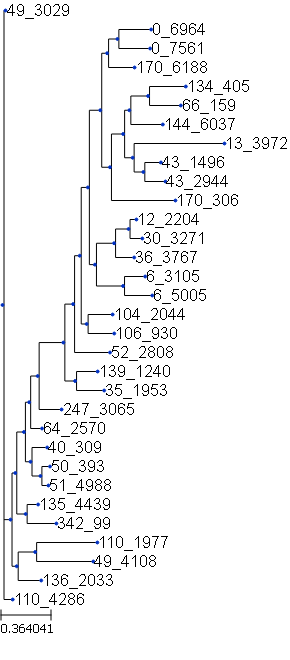

In [6]:
t.render('%%inline')

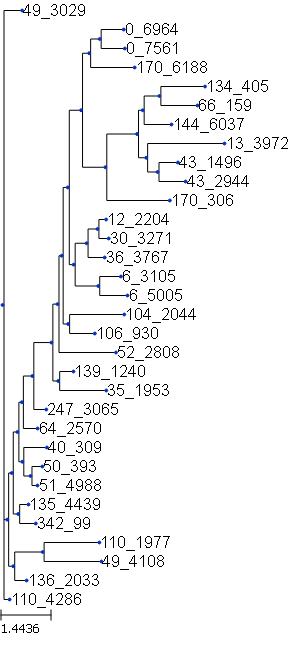

In [7]:
t_out.render('%%inline')

In [18]:
for record in input_alignment:
    print(record.seq + " " + record.id)

In [17]:
format(input_alignment, "fasta")

TypeError: unsupported format string passed to generator.__format__

In [16]:
og = 'OG1299'

#Check if directory exists - if not make it

input_aln= open(os.path.normpath(base_dir + '/alphafold/msas/FILES_ogs_cds_threaded/'  + og + '.mfna.threaded'), "rU")
output_aln = open(os.path.normpath(base_dir + '/alphafold/selection_calculations/'  + og + '/' + og +'_aln.paml'),'w')


input_alignment = AlignIO.parse(f_in, "fasta")
AlignIO.write(input_alignment, f_out, 'phylip')

output_aln.close()
input_aln.close()

#with open(input_aln_fname, "rU") as f_in: 
#with open(output_aln_fname, 'w') as f_out: 


C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


ValueError: I/O operation on closed file.

In [6]:
input_aln

<generator object parse at 0x000001CA66BACE48>

In [ ]:
from Bio import AlignIO



input_handle = open("example.phy", "rU")
output_handle = open("example.sth", "w")

alignments = AlignIO.parse(input_handle, "phylip")
AlignIO.write(alignments, output_handle, "stockholm")

output_handle.close()
input_handle.close()